In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
results = pd.read_csv('logs/results4.csv')

In [26]:
results.head()

,Unnamed: 0,time,count,avg,min,max
0,0,0.0,4.0,33.250000,21.0,53.0
1,1,200.0,20.0,48.050000,21.0,88.0
2,2,400.0,20.0,43.300000,21.0,71.0
3,3,600.0,20.0,47.800000,21.0,72.0
4,4,800.0,19.0,51.736842,21.0,90.0


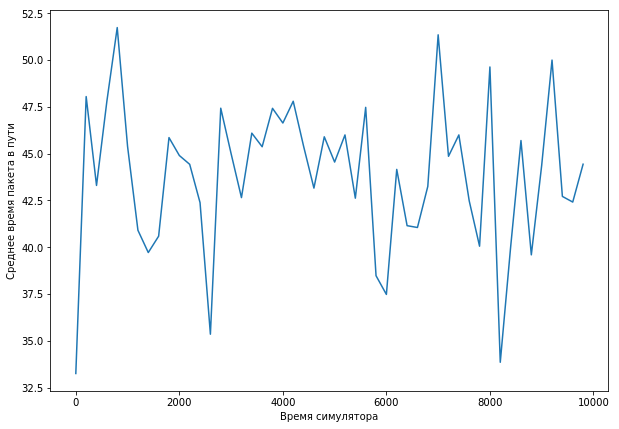

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(results['time'], results['avg'])
plt.xlabel('Время симулятора')
plt.ylabel('Среднее время пакета в пути')
plt.show()